# Learning Lab: Support Vector Machines

In [1]:
import sklearn
import seaborn as sns
from sklearn import datasets
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

## Import the breast cancer dataset
this is a dataset from `sklearn`

In [2]:
cancer = datasets.load_breast_cancer()

x = cancer.data[:, :2]
y = cancer.target


In [3]:
print(cancer.feature_names)
print(cancer.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


## Split the data

In [4]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.2)

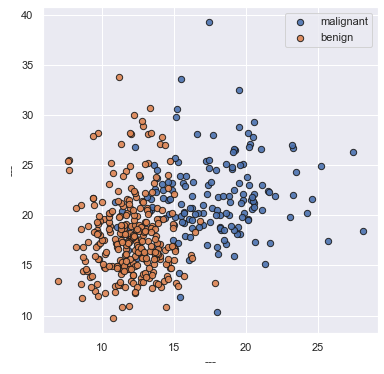

In [5]:
sns.set(color_codes=True)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)

for index, target_name in enumerate(cancer.target_names):
    ax.scatter(x_train[y_train == index, 0], x_train[y_train == index, 1], s=40, 
               alpha=0.9, edgecolors='k', label=target_name)

ax.set_xlabel('---')
ax.set_ylabel('---')
ax.legend()
plt.show()

## Code to plot the decision boundary

In [6]:
def plot_decision_boundary(clf, x_train):
    """
        Code to plot the decision boundary
    """
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
    y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1


    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                                                  np.arange(y_min, y_max, 0.1))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

    # Plot also the training points
    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.show()

## Create and train the SVM

Accuracy: 0.8859649122807017


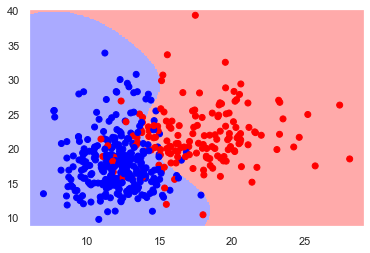

In [7]:
clf = svm.SVC()

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)

print(f"Accuracy: {acc}")

plot_decision_boundary(clf, x_train)

## Adding a kernel to improve the accuracy
In this case we will be adding the `linear kernel`

Accuracy: 0.868421052631579


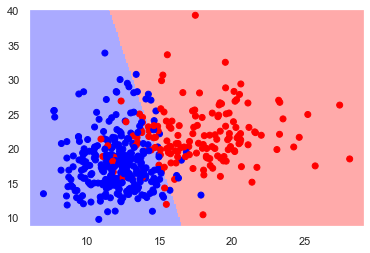

In [8]:
clf = svm.SVC(kernel='linear')

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)

print(f"Accuracy: {acc}")

plot_decision_boundary(clf, x_train)

## Changing the Margin (C)

If you want to play around with some other parameters have a look [here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

Accuracy: 0.868421052631579


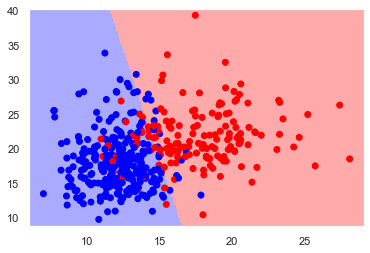

In [9]:
clf = svm.SVC(kernel='linear', C=2)

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)

print(f"Accuracy: {acc}")

plot_decision_boundary(clf, x_train)

# Now try it yourself with another dataset

For example with the [iris dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)